In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('housing.csv')

In [2]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Missing values 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The feature 'total_bedrooms' has lesser values from the rest. It points out there may be null values.

In [4]:
df['total_bedrooms'].isnull().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

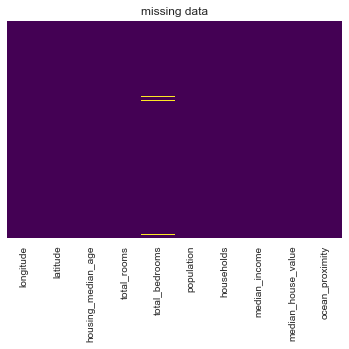

In [5]:
# alternative method of missing data visualization
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()



In [6]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


We can see that indeed total_bedrooms has 207 null values in the dataframe. Perhaps we can fill in the missing values with linear regression if another predictor variable correlates strongly with the missing data variable (i.e. total_bedrooms). We can create a heatmap featuring the correlation scores between predictors as below. 

<AxesSubplot:>

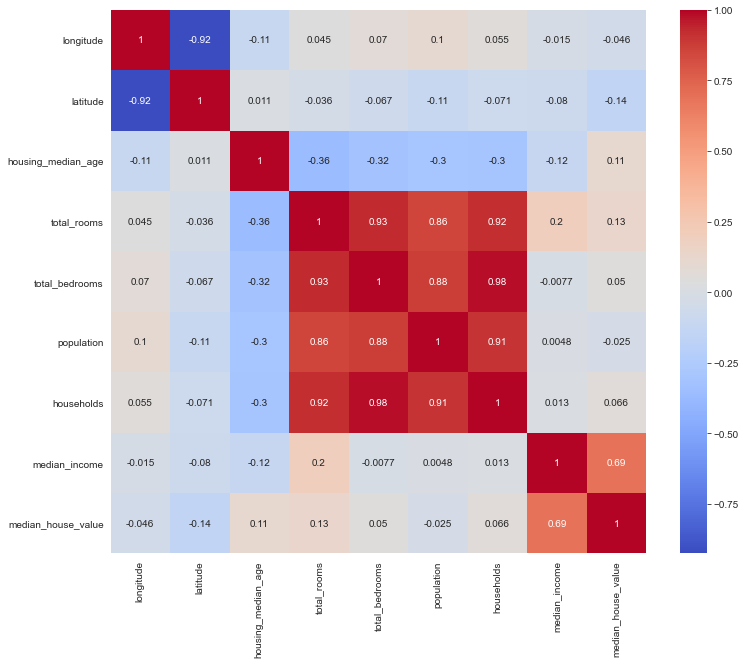

In [7]:
# Bivariate Analysis Correlation plot for numerical features
ft_df = df.iloc[:,0:9] # grab only the numeric feature columns 
plt.figure(figsize=(12,10))
sns.heatmap(ft_df.corr(), annot=True, cmap='coolwarm')

We see that households correlates the strongest with total_bedrooms with r2_score = 0.98.

### Data imputation
I decided to impute the null values of total_bedrooms according to the predicted values obtained from modelling total_bedrooms by households as they showed a clear strong association as evidenced by the heatmap plot. 

In [8]:
null_idx = df[df['total_bedrooms'].isnull()].index

In [9]:
copy_df = df.copy().drop(null_idx)
x = copy_df['households'].values
y = copy_df['total_bedrooms'].values

In [10]:
x_test = df[df['total_bedrooms'].isnull()]['households'].values

In [11]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [12]:
# Apply linear regression to fit the values to the curve.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np
model = LinearRegression()

model.fit(x,y)

y_pred = model.predict(x)
y_imput = model.predict(x_test.reshape(-1,1))
impute_df = pd.DataFrame(y_imput, columns=['values'])
impute_df = impute_df.astype(float)

print(f'MSE score: {int(mean_squared_error(y,y_pred))}')
print(f'R2 score: {r2_score(y,y_pred)}')

MSE score: 7125
R2 score: 0.9598674846137024


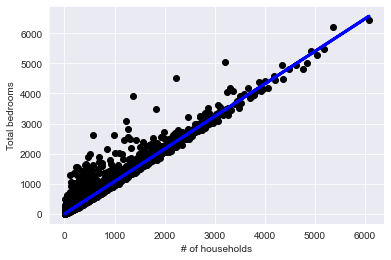

In [13]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.ylabel('Total bedrooms')
plt.xlabel('# of households')
plt.show()

In [14]:
y_pred[0:10] # Show first 10 impute values predicted by linear regression

array([[ 134.6017732 ],
       [1227.45509895],
       [ 189.67639732],
       [ 235.03197013],
       [ 278.22775376],
       [ 206.95471077],
       [ 553.60087438],
       [ 697.22685494],
       [ 641.07233622],
       [ 769.57979251]])

In [17]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(dict(zip(df[df['total_bedrooms'].isnull()].index, y_pred)))
df['total_bedrooms'] = df['total_bedrooms'].astype(int)

df.reindex(null_idx)[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,134,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,1227,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,189,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,235,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,278,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,206,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,553,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,697,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,641,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,769,1339.0,499.0,6.7061,322300.0,NEAR BAY


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  int32  
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), int32(1), object(1)
memory usage: 1.5+ MB


## EDA

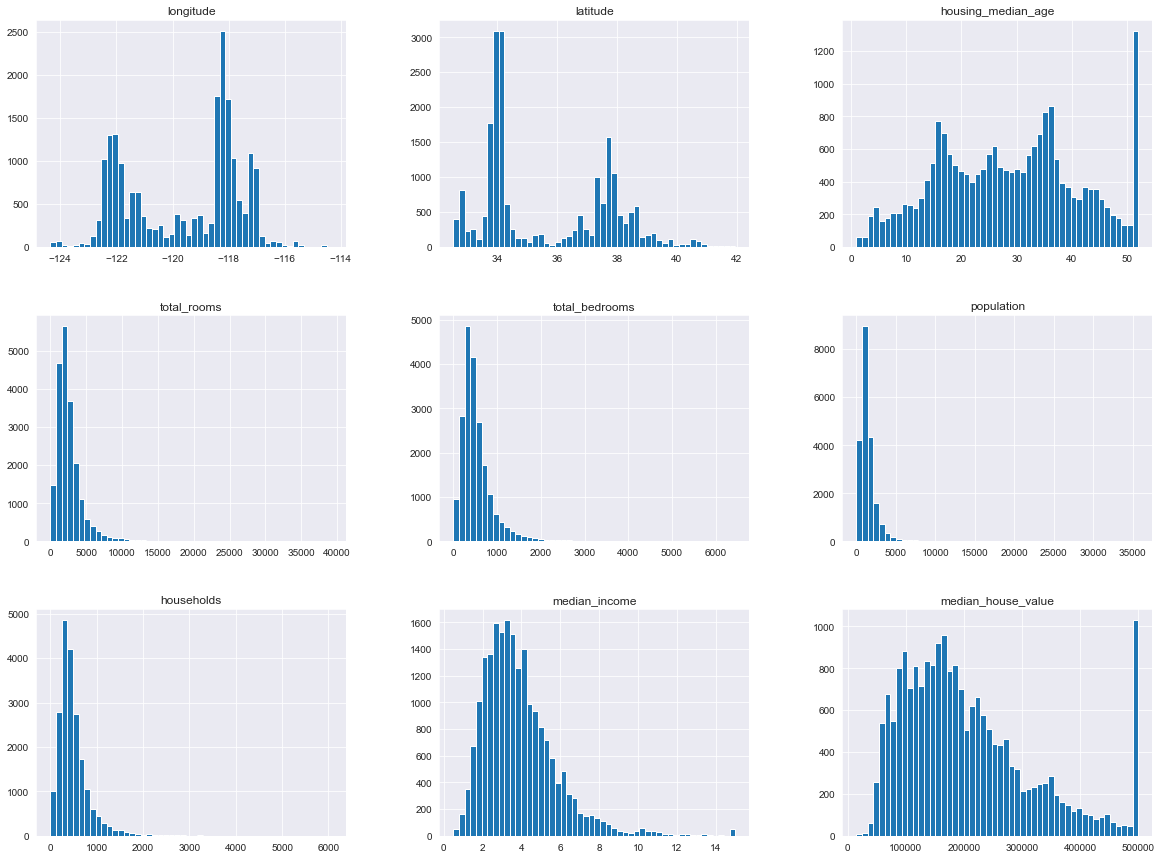

In [19]:
#creating plots on dataset
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

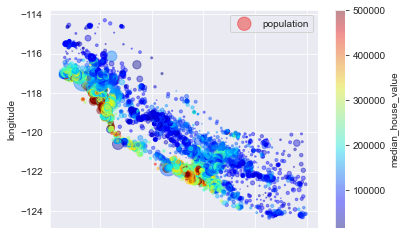

In [20]:
#advanced scatter plot using median value of house
df.plot(kind="scatter",x="latitude",y="longitude",alpha=0.4,
         s=df["population"]/100,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

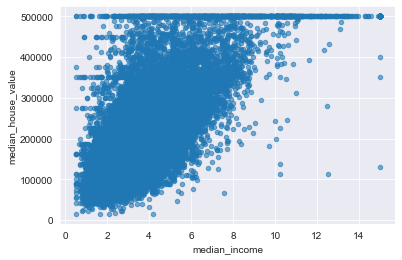

In [21]:
#exploring more on median income
df.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.6)

<Figure size 720x432 with 0 Axes>

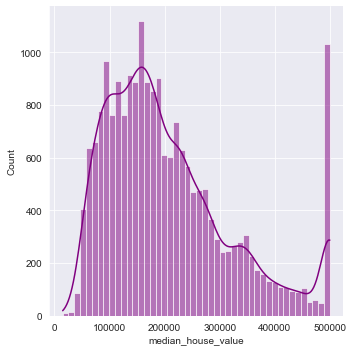

In [22]:
plt.figure(figsize=(10,6))
sns.displot(df['median_house_value'],color='purple', kde=True)
plt.show()
#we can see that area where median price frequency for >= 500000 is surprisngly more and could be a sign of outlier or wrong data

### Removing outliers

In [23]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head() # we see an abnormal quantity of values just above 50,000. This could point to outliers


500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

In [24]:
df = df.loc[df['median_house_value']<500001.0]

In [25]:
df.to_csv('housing2.csv', index=False)